In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [341]:
def mape_score(y_test, pred):
    y_test, pred = np.array(y_test), np.array(pred)
    mape = np.mean(np.abs((y_test - pred) / y_test)) * 100
    return mape

In [342]:
def metrics(test, pred):
    d= {}
    mse = mean_squared_error(test, pred)
    rmse = np.sqrt(mse)
    # r_squared = r2_score(test, pred)
    mape= mape_score(test, pred)
    mae = mean_absolute_error(test, pred)

    d['MSE'] = mse
    d['RMSE'] = rmse
    # d['R-squared'] = r_squared
    d['MAPE'] = mape
    d['MAE'] = mae
    
    return d

In [343]:
df_train_nbeats = pd.read_csv(r'C:\Users\himanshu.verma\vs_code\POC_MGC\Code\nbeats_id16_train.csv')
df_pred_nbeats= pd.read_csv(r'C:\Users\himanshu.verma\vs_code\POC_MGC\Code\nbeats_id16_pred.csv')

In [344]:
df_train_nbeats.tail()

,Unnamed: 0,DATE,GROSS_PROFIT_ACT
31,31,2022-08-01,56383.444193
32,32,2022-09-01,60489.669814
33,33,2022-10-01,69508.293188
34,34,2022-11-01,71556.820228
35,35,2022-12-01,67681.747147


In [345]:
df_pred_nbeats.head()

,DATE,GROSS_PROFIT_ACT,nbeats_pred_new
0,2022-07-01,46250.768972,48447.640159
1,2022-08-01,56383.444193,53344.418212
2,2022-09-01,60489.669814,59722.095187
3,2022-10-01,69508.293188,68212.682369
4,2022-11-01,71556.820228,71238.690696


In [346]:
df_train_nbeats.set_index(['DATE'], inplace= True)
df_train_nbeats.index= pd.to_datetime(df_train_nbeats.index) 
df_train_nbeats

,Unnamed: 0,GROSS_PROFIT_ACT
DATE,,
2020-01-01,0,71606.287100
2020-02-01,1,69344.308177
2020-03-01,2,97909.782700
2020-04-01,3,329265.744546
2020-05-01,4,166318.087051
2020-06-01,5,106871.775105
2020-07-01,6,73242.137647
2020-08-01,7,73206.201828
2020-09-01,8,74195.502900


In [347]:
df_pred_nbeats.set_index(['DATE'], inplace= True)

In [348]:
df_pred_nbeats.index= pd.to_datetime(df_pred_nbeats.index) 

In [349]:
df_pred_nbeats

,GROSS_PROFIT_ACT,nbeats_pred_new
DATE,,
2022-07-01,46250.768972,48447.640159
2022-08-01,56383.444193,53344.418212
2022-09-01,60489.669814,59722.095187
2022-10-01,69508.293188,68212.682369
2022-11-01,71556.820228,71238.690696
2022-12-01,67681.747147,82990.342287


In [350]:
# ID-16

metrics(df_pred_nbeats['GROSS_PROFIT_ACT'], df_pred_nbeats['nbeats_pred_new'])

{'MSE': 41797331.95117795,
 'RMSE': 6465.08561050648,
 'MAPE': 6.055970270490199,
 'MAE': 3820.967880852791}

Text(0, 0.5, 'Gross Profit')

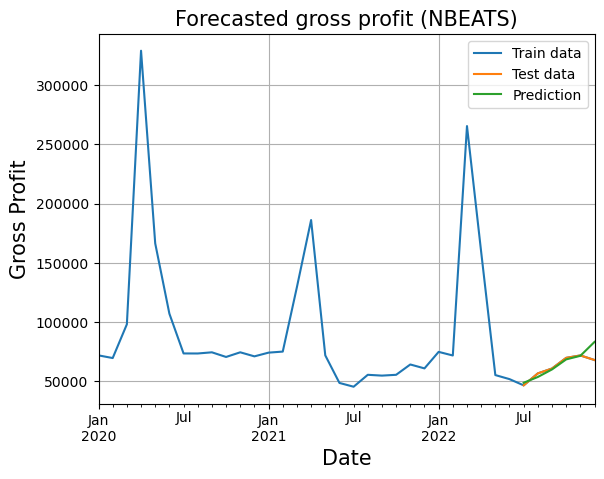

In [351]:
df_train_nbeats['GROSS_PROFIT_ACT'].plot(label= 'Train data', linewidth= 1.5)
df_pred_nbeats['GROSS_PROFIT_ACT'].plot(label= 'Test data', linewidth= 1.5)
df_pred_nbeats['nbeats_pred_new'].plot(label= 'Prediction', linewidth= 1.5)
plt.grid()
plt.legend()
plt.title('Forecasted gross profit (NBEATS)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Gross Profit', fontsize=15)

Text(0, 0.5, 'Gross Profit')

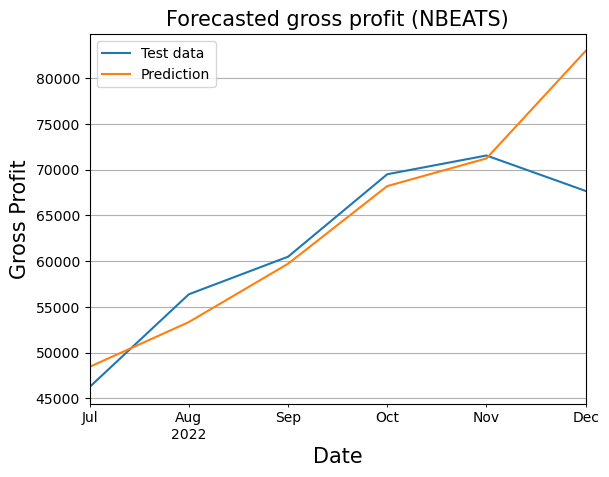

In [352]:
df_pred_nbeats['GROSS_PROFIT_ACT'].plot(label= 'Test data', linewidth= 1.5)
df_pred_nbeats['nbeats_pred_new'].plot(label= 'Prediction', linewidth= 1.5)
plt.grid()
plt.legend()
plt.title('Forecasted gross profit (NBEATS)')
plt.ylabel('Gross Profit')
plt.title('Forecasted gross profit (NBEATS)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Gross Profit', fontsize=15)

## Volume forecasting

In [353]:
path_vol_train = r'C:\Users\himanshu.verma\vs_code\POC_MGC\Code\nbeats_vol_id16_train.csv'
path_vol_pred = r'C:\Users\himanshu.verma\vs_code\POC_MGC\Code\nbeats_vol_id16_pred.csv' 

In [354]:
df_vol_train = pd.read_csv(path_vol_train)
df_vol_pred = pd.read_csv(path_vol_pred)

In [355]:
df_vol_train.set_index(['DATE'], inplace= True)
df_vol_train.index= pd.to_datetime(df_vol_train.index) 
df_vol_train

,VOLUME_MT_ACT
DATE,
2020-01-01,44.762689
2020-02-01,46.115940
2020-03-01,66.651414
2020-04-01,236.641362
2020-05-01,95.513114
2020-06-01,60.648748
2020-07-01,39.478902
2020-08-01,38.925715
2020-09-01,42.331175


In [356]:
df_vol_pred.set_index(['DATE'], inplace= True)
df_vol_pred.index= pd.to_datetime(df_vol_pred.index) 
df_vol_pred

,VOLUME_MT_ACT,nbeats_pred_new
DATE,,
2022-07-01,29.837401,30.971318
2022-08-01,32.519767,32.322175
2022-09-01,37.089451,38.095702
2022-10-01,40.594059,40.163694
2022-11-01,40.481685,44.032585
2022-12-01,40.078149,45.601425


In [357]:
# metrics for ID-16 (volume)

metrics(df_vol_pred['VOLUME_MT_ACT'], df_vol_pred['nbeats_pred_new'])

{'MSE': 7.606338662846021,
 'RMSE': 2.757959148146691,
 'MAPE': 5.12233595509895,
 'MAE': 1.9737166256305378}

Text(0, 0.5, 'Volume in MT')

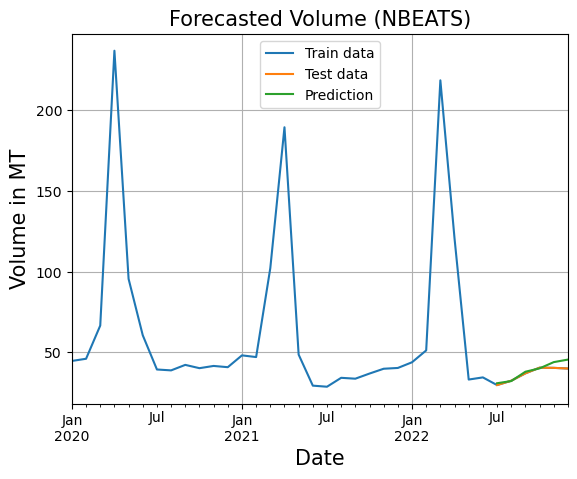

In [358]:
df_vol_train['VOLUME_MT_ACT'].plot(label= 'Train data', linewidth= 1.5)
df_vol_pred['VOLUME_MT_ACT'].plot(label= 'Test data', linewidth= 1.5)
df_vol_pred['nbeats_pred_new'].plot(label= 'Prediction', linewidth= 1.5)
plt.grid()
plt.legend()
plt.title('Forecasted Volume (NBEATS)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume in MT', fontsize=15)

Text(0, 0.5, 'Volume')

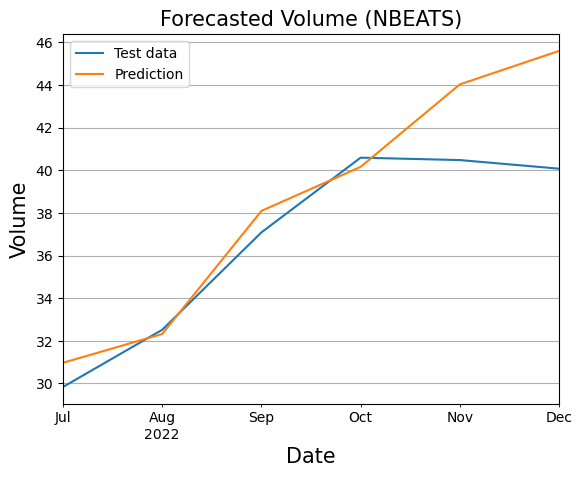

In [359]:
df_vol_pred['VOLUME_MT_ACT'].plot(label= 'Test data', linewidth= 1.5)
df_vol_pred['nbeats_pred_new'].plot(label= 'Prediction', linewidth= 1.5)
plt.grid()
plt.legend()
plt.title('Forecasted Volume (NBEATS)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)

In [360]:
path_vol_train_9 = r'C:\Users\himanshu.verma\vs_code\POC_MGC\Code\nbeats_vol_id9_train_jhgasd.csv'
path_vol_pred_9 = r'C:\Users\himanshu.verma\vs_code\POC_MGC\Code\nbeats_vol_id9_pred.csv' 

df_vol_train_9 = pd.read_csv(path_vol_train_9)
df_vol_pred_9 = pd.read_csv(path_vol_pred_9)

df_vol_train_9.set_index(['DATE'], inplace= True)
df_vol_train_9.index= pd.to_datetime(df_vol_train_9.index) 
df_vol_train_9

df_vol_pred_9.set_index(['DATE'], inplace= True)
df_vol_pred_9.index= pd.to_datetime(df_vol_pred_9.index) 
df_vol_pred_9

,VOLUME_MT_ACT,nbeats_pred_new
DATE,,
2022-07-01,37.059700,36.687285
2022-08-01,39.011809,35.749024
2022-09-01,32.616830,36.569859
2022-10-01,34.390350,35.101388
2022-11-01,31.527350,35.906645
2022-12-01,32.354250,33.947957


In [361]:
# metrics for ID-9 (volume)

metrics(df_vol_pred_9['VOLUME_MT_ACT'], df_vol_pred_9['nbeats_pred_new'])

{'MSE': 8.105765309474215,
 'RMSE': 2.8470625756161763,
 'MAPE': 7.0619839210440905,
 'MAE': 2.3787113811413385}

Text(0, 0.5, 'Volume in MT')

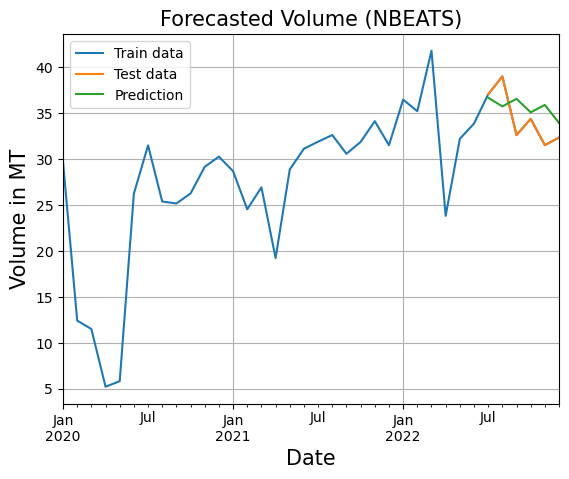

In [362]:
df_vol_train_9['VOLUME_MT_ACT'].plot(label= 'Train data', linewidth= 1.5)
df_vol_pred_9['VOLUME_MT_ACT'].plot(label= 'Test data', linewidth= 1.5)
df_vol_pred_9['nbeats_pred_new'].plot(label= 'Prediction', linewidth= 1.5)
plt.grid()
plt.legend()
plt.title('Forecasted Volume (NBEATS)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume in MT', fontsize=15)

Text(0, 0.5, 'Volume')

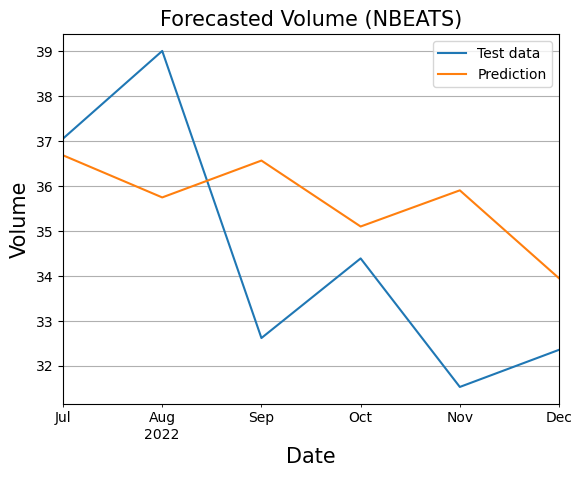

In [363]:
df_vol_pred_9['VOLUME_MT_ACT'].plot(label= 'Test data', linewidth= 1.5)
df_vol_pred_9['nbeats_pred_new'].plot(label= 'Prediction', linewidth= 1.5)
plt.grid()
plt.legend()
plt.title('Forecasted Volume (NBEATS)', fontsize=15)
plt.xlabel('Date', fontsize=15)
plt.ylabel('Volume', fontsize=15)